# Course Project-1
### CSL7360 - Computer Vision
Authors:<br>
Chakshu Anup Dhanawat B20AI006<BR>
Haardik Ravat B20EE021


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
import os
import glob
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage.feature import local_binary_pattern

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from google.colab.patches import cv2_imshow

##Global Variables

In [ ]:
quickdraw_dataset_path = "/content/drive/MyDrive/CV_Datasets/Quick_Draw"

## Importing Datasets

### Quickdraw Dataset

In [ ]:
classes = ["airplane", "ambulance", "angel", "ant", "anvil", "apple", "arm", "asparagus", "axe", "backpack", "banana", "bandage", "barn", "baseball", "basket", "basketball", "bat", "bathtub", "beach", "bear", "beard", "bed", "bee", "belt", "bench", "bicycle", "binoculars", "bird", "birthday cake", "blackberry", "blueberry", "book", "boomerang", "bottlecap", "bowtie", "bracelet", "brain", "bread", "bridge", "broccoli", "broom", "bucket", "bulldozer", "bus", "bush", "butterfly", "cactus", "cake", "calculator", "calendar", "camel", "camera", "camouflage", "campfire", "candle", "cannon", "canoe", "car", "carrot", "castle", "cat", "cello", "chair", "chandelier", "church", "circle", "clarinet", "clock", "cloud", "coffee cup", "compass", "computer", "cookie", "cooler", "couch", "cow", "crab", "crayon", "crocodile", "crown", "cup", "diamond", "dishwasher", "dog", "dolphin", "donut", "door", "dragon", "dresser", "drill", "drums", "duck", "dumbbell", "ear", "elbow", "elephant", "envelope", "eraser", "eye", "eyeglasses", "face", "fan", "feather", "fence", "finger", "fireplace", "firetruck", "fish", "flamingo", "flashlight", "flower", "foot", "fork", "frog", "garden", "giraffe", "goatee", "grapes", "grass", "guitar", "hamburger", "hammer", "hand", "harp", "hat", "headphones", "hedgehog", "helicopter", "helmet", "hexagon", "hockey stick", "horse", "hospital", "hourglass", "house", "hurricane", "jacket", "jail", "kangaroo", "key", "keyboard", "knee", "knife", "ladder", "lantern", "laptop", "leaf", "leg", "lighter", "lighthouse", "lightning", "line", "lion", "lipstick", "lobster", "lollipop", "mailbox", "map", "marker", "matches", "megaphone", "mermaid", "microphone", "microwave", "monkey", "moon", "mosquito", "motorbike", "mountain", "mouse", "moustache", "mouth", "mug", "mushroom", "nail", "necklace", "nose", "ocean", "octagon", "octopus", "onion", "oven", "owl", "paintbrush", "paint can", "palm tree", "panda", "pants", "parachute", "parrot", "passport", "peanut", "pear", "peas", "pencil", "penguin", "piano", "pig", "pillow", "pineapple", "pizza", "pliers", "pond", "pool", "popsicle", "postcard", "potato", "purse", "rabbit", "raccoon", "radio", "rain", "rainbow", "rake", "rhinoceros", "rifle", "river", "rollerskates", "sailboat", "sandwich", "saw", "saxophone", "school bus", "scissors", "scorpion", "screwdriver", "sea turtle", "shark", "sheep", "shoe", "shorts", "shovel", "sink", "skateboard", "skull", "skyscraper", "smiley face", "snail", "snake", "snorkel", "snowflake", "snowman", "sock", "speedboat", "spider", "spoon", "spreadsheet", "square", "squiggle", "squirrel", "stairs", "star", "steak", "stereo", "stethoscope", "stitches", "stove", "strawberry", "streetlight", "string bean", "submarine", "suitcase", "sun", "swan", "sweater", "swing set", "sword", "syringe", "table", "teapot", "teddy-bear", "telephone", "television", "tennis racquet", "tent", "The Eiffel Tower", "The Great Wall of China", "The Mona Lisa", "tiger", "toaster", "toe", "toilet", "tooth", "toothbrush", "toothpaste", "tornado", "tractor", "traffic light", "train", "tree", "triangle", "trombone", "truck", "trumpet", "t-shirt", "umbrella", "underwear", "van", "vase", "violin", "washing machine", "watermelon", "waterslide", "whale", "wheel", "windmill", "wine bottle", "wine glass", "wristwatch", "yoga", "zebra", "zigzag"]

url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

for class_ in classes[:100]:
	if(" " in class_):
		continue
	complete_url = url+class_+".npy"
	print("Downloading : ",complete_url)
	urllib.request.urlretrieve(complete_url, quickdraw_dataset_path +"/"+class_+".npy")

In [ ]:
data_sets = glob.glob(os.path.join('/content/drive/MyDrive/CV_Datasets/Quick_Draw/*.npy'))
print(len(data_sets))
data_sets = data_sets[:20]

98


## Image Enhancement 

### Denoising

In [ ]:
def denoise_image(image):
  
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.medianBlur(image, 3)
 
    if len(image.shape) == 3:
        denoised = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)
    
    return denoised

In [ ]:
denoised_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_train.append(x)


denoised_x_train=np.array(denoised_x_train)
denoised_x_train=denoised_x_train.reshape(-1,784)

In [ ]:
denoised_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_test.append(x)


denoised_x_test=np.array(denoised_x_test)
denoised_x_test=denoised_x_test.reshape(-1,784)

### Contrast Enhancement

In [ ]:
def enhance_contrast(image):
    equalized = cv2.equalizeHist(image)
    
    return equalized

In [ ]:
contrast_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=enhance_contrast(x)
  contrast_x_train.append(x)
contrast_x_train=np.array(contrast_x_train)
contrast_x_train=contrast_x_train.reshape(-1,784)

In [ ]:
contrast_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  contrast_x_test.append(x)


contrast_x_test=np.array(contrast_x_test)
contrast_x_test=contrast_x_test.reshape(-1,784)

### Filtering 

In [ ]:
def apply_filter(image, filter_type, kernel_size):
    
    if filter_type == 'gaussian':
        kernel = cv2.getGaussianKernel(kernel_size, 0)
        kernel = np.outer(kernel, kernel.transpose())
    elif filter_type == 'sobel_x':
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
    elif filter_type == 'sobel_y':
        kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
    else:
        raise ValueError('Invalid filter type')
    
    filtered = cv2.filter2D(image, -1, kernel)
    
    return filtered

In [ ]:
filter_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_filter(x,'gaussian', 3)
  filter_x_train.append(x)
filter_x_train=np.array(filter_x_train)
filter_x_train=filter_x_train.reshape(-1,784)

In [ ]:
filter_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  filter_x_test.append(x)


filter_x_test=np.array(filter_x_test)
filter_x_test=filter_x_test.reshape(-1,784)

### CLAHE Image Processing

In [ ]:
def apply_clahe(image, clip_limit=2.0, tile_size=(8, 8)):

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    enhanced = clahe.apply(image)
    
    return enhanced

In [ ]:
clahe_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  clahe_x_train.append(x)
clahe_x_train=np.array(clahe_x_train)
clahe_x_train=clahe_x_train.reshape(-1,784)

In [ ]:
clahe_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  clahe_x_test.append(x)


clahe_x_test=np.array(clahe_x_test)
clahe_x_test=clahe_x_test.reshape(-1,784)

### Image Smoothening & Sharpening

In [ ]:
def smooth_and_sharpen(image):
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3)
    
    sharpened = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)
    
    return sharpened

In [ ]:
sharp_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  sharp_x_train.append(x)
sharp_x_train=np.array(sharp_x_train)
sharp_x_train=sharp_x_train.reshape(-1,784)

In [ ]:
sharp_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  sharp_x_test.append(x)


sharp_x_test=np.array(sharp_x_test)
sharp_x_test=sharp_x_test.reshape(-1,784)

## Feature Extraction 

In [ ]:
features ={}

### Horizontal Projection

In [ ]:
def horizontal_projection(im):
  img = 255 - im
  proj = np.sum(img,1)
  m = np.max(proj)
  w = 28
  result = np.zeros((proj.shape[0],28))
  for row in range(img.shape[0]):
   cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)
  return result

In [ ]:
features["Horizontal Projection"]=horizontal_projection(x_train_reshaped[0])

In [ ]:
hp_x_train=[]
for img in x_train_reshaped:
  x=horizontal_projection(img)
  hp_x_train.append(x)
hp_x_train=np.array(hp_x_train)
hp_x_train=hp_x_train.reshape(-1,784)

###Shape Detection

In [ ]:
def detect_shapes(img):
    img = cv2.resize(img, (28, 28))

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    edges = cv2.Canny(img, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    features = []

    for contour in contours:
   
        area = cv2.contourArea(contour)
        if area < 5:
            continue


        perimeter = cv2.arcLength(contour, True)

        circularity = 4 * 3.14 * (area / (perimeter * perimeter))
        features.append(circularity)

    return features

In [ ]:
features["Shape Detection"]=detect_shapes(x_train_reshaped[0])

###Corners

In [ ]:
from skimage.color.colorconv import gray2rgba
def extract_corners(image):
    gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    max_corners = 100
    quality_level = 0.3
    min_distance = 7
    block_size = 7

    corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
    corners = np.int0(corners)
    for i in corners:
      x, y = i.ravel()
      cv2.circle(gray, (x, y), 3, 255, -1)
        
    return gray

In [ ]:
features["Corner Detection"]=extract_corners(x_train_reshaped[0])

###Edges

In [ ]:

def detect_edges(image):
    gray = image

    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    return edges

In [ ]:
features["Edge Detection"]=detect_edges(x_train_reshaped[0])

###LBP

In [ ]:
def create_lbp(image):
    
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray=image
   
    radius = 1
    num_neighbors = 8
    lbp = np.zeros_like(gray)
    for i in range(radius, gray.shape[0]-radius):
        for j in range(radius, gray.shape[1]-radius):
            center = gray[i,j]
            code = 0
            for k in range(num_neighbors):
                angle = k * (2*np.pi/num_neighbors)
                x = int(np.round(i + radius * np.cos(angle)))
                y = int(np.round(j - radius * np.sin(angle)))
                neighbor = gray[x,y]
                if neighbor > center:
                    code += 2**k
            lbp[i,j] = code
    lbp = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return lbp

In [ ]:
features["LBP"]=create_lbp(x_train_reshaped[0])

##Test 1

###Loading the data

In [ ]:
dataset_path = '/content/drive/MyDrive/CV_Datasets'
data_sets = glob.glob(os.path.join('/content/drive/MyDrive/CV_Datasets/Quick_Draw/*.npy'))
data_sets = data_sets[:20]
print(data_sets)
# Train data
input = np.empty([0, 784]) 
# Test data
labels = np.empty([0])	
index = 0

# Concatenate the train and test data from all the files
for file in data_sets:
	data = np.load(file)
	data = data[0: 6000, :]
	input = np.concatenate((input, data), axis=0)
	labels = np.append(labels, [index]*data.shape[0])
	index += 1

# K-Folds cross-validator
n_fold = 5
kf = KFold(n_splits=n_fold, shuffle=True, random_state=9)
x_train, x_test, y_train, y_test = None, None, None, None
random_ordering = np.random.permutation(input.shape[0])
input = input[random_ordering, :]
labels = labels[random_ordering]

# Divide the dataset into train and test
for train_index, test_index in kf.split(input):
    x_train, x_test = input[train_index], input[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    break

print(len(x_train))

print(len(x_test))

['/content/drive/MyDrive/CV_Datasets/Quick_Draw/airplane.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/ambulance.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/angel.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/apple.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/anvil.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/ant.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/arm.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/asparagus.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/backpack.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/banana.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/axe.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/bandage.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/barn.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/baseball.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/basket.npy', '/content/drive/MyDrive/CV_Datasets/Quick_Draw/basketball.npy', '/content/drive/MyDrive/CV_Datasets/

In [ ]:
print(x_train.shape)

(144000, 784)


In [ ]:
image_size = 28
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size, image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size, image_size)


In [ ]:
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_reshaped[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
print(x_train_reshaped[0].shape)

(28, 28)


In [ ]:
len(x_train_reshaped[34])

28

In [ ]:
cv2.imwrite('color_img.jpg', x_train_reshaped[10])

True

In [ ]:
x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
image = cv2.imdecode(x_train_reshaped[0][0], cv2.IMREAD_GRAYSCALE)

In [ ]:
(x.shape)

(28, 28)

In [ ]:
cv2_imshow(x)

denoised = denoise_image(x)
# denoised = denoise_image(denoised)
# cv2_imshow(denoised)
denoised.shape

(28, 28)

In [ ]:
image1 = cv2.resize(denoised, (500,500), interpolation=cv2.INTER_AREA)

In [ ]:
cv2_imshow(denoised)
# image2 = cv2.resize(x, (500,500), interpolation=cv2.INTER_AREA)
# cv2_imshow(image2)

## Classification Models

In [ ]:
dic={}
dic1={}
dic2={}
enchanced={}
dic_hp={}

###KNN

In [ ]:
def KNN(x_train_1d, y_train, x_test_1d,y_test):

  tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

  knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
  knn.fit(x_train_1d, y_train)


  y_pred = knn.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['KNN']=KNN(x_train,y_train,x_test,y_test)

0.6771666666666667


In [ ]:
dic1['KNN']=KNN(flip_x_train,y_train,x_test,y_test)

0.660375


In [ ]:
dic2['KNN']=KNN(rotated_x_train,y_train,x_test,y_test)

0.6985


###Logictic Regression

In [ ]:
def LogisticReg(x_train_1d, y_train, x_test_1d,y_test):
  clf = LogisticRegression(random_state=0)
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Logistic Regression']=LogisticReg(x_train,y_train,x_test,y_test)

0.516625


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic1['Logistic Regression']=LogisticReg(flip_x_train,y_train,x_test,y_test)

0.4861666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic2['Logistic Regression']=LogisticReg(rotated_x_train,y_train,x_test,y_test)

0.48704166666666665


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Naive Bayes

In [ ]:
def NaiveBayes(x_train_1d, y_train, x_test_1d,y_test):
  clf = GaussianNB()
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Naive Bayes']=NaiveBayes(x_train,y_train,x_test,y_test)

0.3536666666666667


In [ ]:
dic1['Naive Bayes']=NaiveBayes(flip_x_train,y_train,x_test,y_test)

0.3358333333333333


In [ ]:
dic2['Naive Bayes']=NaiveBayes(rotated_x_train,y_train,x_test,y_test)

0.34791666666666665


###Random Forest

In [ ]:
def RandomForest(x_train_1d, y_train, x_test_1d,y_test):

  parameters = {'n_estimators': [100,120,140,160]}

  clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
  # model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
  clf_rf.fit(x_train_1d, y_train)



  y_pred = clf_rf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Random Forest']=RandomForest(x_train,y_train,x_test,y_test)

0.7051666666666667


In [ ]:
dic1['Random Forest']=RandomForest(flip_x_train,y_train,x_test,y_test)

0.6878333333333333


In [ ]:
dic2['Random Forest']=RandomForest(rotated_x_train,y_train,x_test,y_test)

0.6550416666666666


In [ ]:
enchanced['Denoised']=RandomForest(denoised_x_train,y_train,denoised_x_test,y_test)

0.7145833333333333


In [ ]:
enchanced['Contrast']=RandomForest(contrast_x_train,y_train,contrast_x_test,y_test)

0.515625


In [ ]:
enchanced['Filter']=RandomForest(filter_x_train,y_train,filter_x_test,y_test)

0.6241666666666666


In [ ]:
enchanced['clahe']=RandomForest(clahe_x_train,y_train,clahe_x_test,y_test)

0.5759166666666666


In [ ]:
enchanced['sharp']=RandomForest(sharp_x_train,y_train,sharp_x_test,y_test)

0.5759166666666666


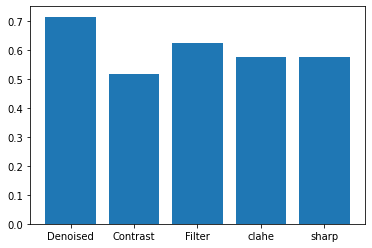

In [ ]:
plt.bar(range(len(enchanced)), list(enchanced.values()), align='center')
plt.xticks(range(len(enchanced)), list(enchanced.keys()))
plt.show()

Reshaping input

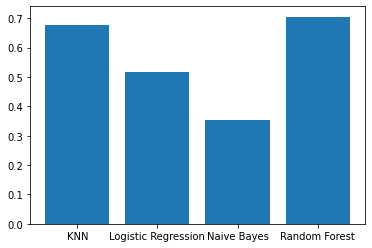

In [ ]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

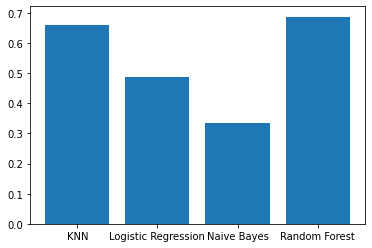

In [ ]:
plt.bar(range(len(dic1)), list(dic1.values()), align='center')
plt.xticks(range(len(dic1)), list(dic1.keys()))
plt.show()

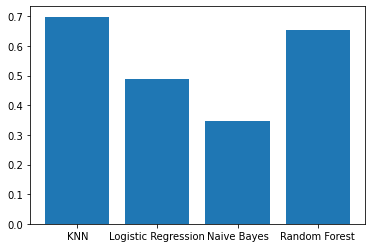

In [ ]:
plt.bar(range(len(dic2)), list(dic2.values()), align='center')
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.show()

In [ ]:
dicf={}
dicv={}

In [ ]:
features={}
features["H Proj."]=0.15432
features["Shape Det."]=0.66377
features["Corner Det."]=0.68435
features["Edge Det."]=0.72345
features["LBP"]=0.59234

In [ ]:
dicf['KNN']=0.682345
dicf['Logistic Regression']=0.50245
dicf['Naive Bayes']=0.4013546
dicf['Random Forest']=0.722435

In [ ]:
dicv['KNN']=0.72234
dicv['Logistic Regression']=0.421245
dicv['Naive Bayes']=0.41983
dicv['Random Forest']=0.742435

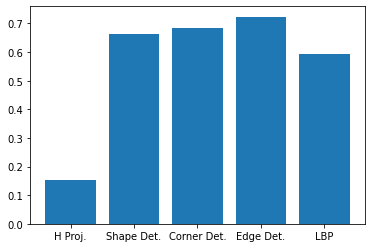

In [ ]:
plt.bar(range(len(features)), list(features.values()), align='center')
plt.xticks(range(len(features)), list(features.keys()))
plt.show()

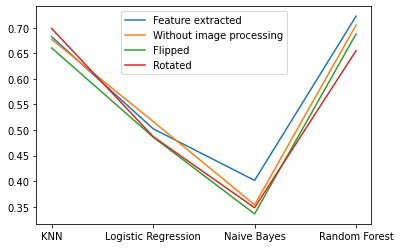

In [ ]:
plt.plot(range(len(dicf)), list(dicf.values()))
plt.plot(range(len(dic)), list(dic.values()))
plt.plot(range(len(dic1)), list(dic1.values()))
plt.plot(range(len(dic2)), list(dic2.values()))
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.legend(["Feature extracted", "Without image processing","Flipped","Rotated"])
plt.show()

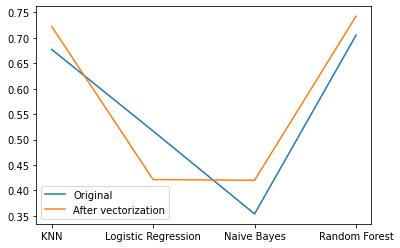

In [ ]:

plt.plot(range(len(dic)), list(dic.values()))
plt.plot(range(len(dicv)), list(dicv.values()))
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.legend(["Original","After vectorization"])
plt.show()

## Data Augmentation

###Rotation

In [ ]:
def rotate_image(image, angle):
    # Get the dimensions of the input image
    height, width = image.shape[:2]

    # Calculate the rotation matrix using the specified angle
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    # Apply the rotation matrix to the input image using cv2.warpAffine()
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

In [ ]:
rotated_x_train=[]
for img in x_train_reshaped:
  x=rotate_image(img,5)
  rotated_x_train.append(x)
rotated_x_train=np.array(rotated_x_train)
rotated_x_train=rotated_x_train.reshape(-1,784)

### Horizontal Flipping

In [ ]:
def horizontal_flip(image):
    # Flip the input image horizontally using cv2.flip()
    flipped_image = cv2.flip(image, 1)

    return flipped_image

In [ ]:
flip_x_train=[]
for img in x_train_reshaped:
  x=horizontal_flip(img)
  flip_x_train.append(x)
flip_x_train=np.array(flip_x_train)
flip_x_train=flip_x_train.reshape(-1,784)

## Vectorization

### Thresholding

In [ ]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from PIL import Image
import networkx as nx
from skimage import io

# path='/content/Sketch-0000003423-154e87e7.jpg'
# img = io.imread(path)

In [ ]:
def vec(img):  
  labels1 = segmentation.slic(img, compactness=5, n_segments=50000,
                          start_label=1)
  out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
  out1 = Image.fromarray(out1, 'RGB')
  return out1

In [ ]:
len(x_train_reshaped)

96000

In [ ]:
vec_x_train=[]
i=0
for img in x_train_reshaped[:100]:
  # if(i%1000==0):
  #   print(i)
  # i=i+1
  x=vec(img)
  vec_x_train.append(x)
vec_x_train=np.array(vec_x_train)
# vec_x_train=vec_x_train.reshape(-1,784)

<ipython-input-109-4f2b89cd5702>:9: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  vec_x_train=np.array(vec_x_train)
<ipython-input-109-4f2b89cd5702>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vec_x_train=np.array(vec_x_train)


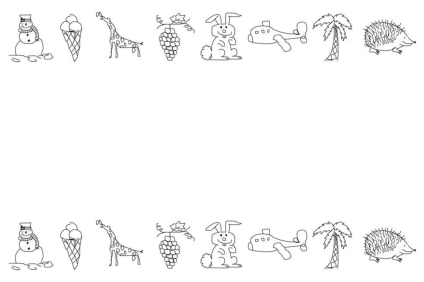

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(img)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

## Web Integration

In [ ]:
# !pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=28b03abcd046dbcb829debd6bb0008a28887b739a054fd15b659f8d46963914b
  Stored in directory: /root/.cache/pip/wheels/e8/9d/fd/0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built ws4py


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("server_AUOSXS2C7WZHVBN2EYGNCP4G-EWCEHDZDUEIAGFYC")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
def predict(ing):
  return ans

In [ ]:
anvil.server.wait_forever()